<a href="https://colab.research.google.com/github/Vrushti07/Synapse/blob/week4/Copy_of_Synapse_LP_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
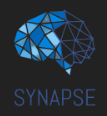

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/adult_income_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Dealing with Nan values

In [ ]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df['workclass'].fillna((df['workclass'].value_counts().mean()),inplace=True)
df['occupation'].fillna((df['occupation'].value_counts().mean()),inplace=True)
df['native-country'].fillna((df['native-country'].value_counts().mean()),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [ ]:
#Write your code here
grouped = df.groupby(['relationship', 'race', 'sex'])['fnlwgt'].mean()
max_avg_fnlwgt = grouped.max()
print(grouped)
print(max_avg_fnlwgt)
#fnlwgt bascically represents how many people someone in the dataset represents. So, if a person has a weight of 200, it's like saying that this person stands in for 200 people with similar traits in the whole population.
#fnlwgt stands for final weight

relationship    race                sex   
Husband         Amer-Indian-Eskimo  Male      126480.119565
                Asian-Pac-Islander  Male      169612.973171
                Black               Male      244901.864382
                Other               Male      215741.250000
                White               Female    175878.000000
                                    Male      184700.296675
Not-in-family   Amer-Indian-Eskimo  Female    132342.157895
                                    Male      134931.906977
                Asian-Pac-Islander  Female    158212.021505
                                    Male      159002.363636
                Black               Female    200278.417526
                                    Male      234694.662736
                Other               Female    167190.562500
                                    Male      215458.073171
                White               Female    183169.122443
                                    Male      195293.0484

## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [ ]:
#write your code here
df.head(7)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [ ]:
df.drop(['education-num'], axis=1, inplace=True)
df.drop(['relationship'], axis=1, inplace=True)

## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

In [ ]:
#Write your code here
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['education','occupation','native-country']
for i in cols:
  print(f'{i}: {len(list(df[i].unique()))}')
ohe_cols = ['workclass','marital-status','race','sex']
df = pd.get_dummies(df, columns = ohe_cols,dtype = int)
for i in cols:
      df[i] = le.fit_transform(df[i])
df

education: 16
occupation: 15
native-country: 42


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float64', 'str']

## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [ ]:
#write your code here
df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [ ]:
#write your code here
X=df.drop(['income'], axis=1)
y=df['income']
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=1, test_size=0.3)

### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

In [ ]:
#import the model and apply it to the data
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Prof-specialty'

Find the accuracy and confusion matrix for the same and explain what it shows.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Naive Bayes Algorithm

* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
#import the model from sklearn and apply it to your data
# from sklearn.feature_extraction.text import CountVectorizer

# v=CountVectorizer()
# X_train_count=v.fit_transform(X_train.values)
# X_train_count.toarray()[:3]

# from sklearn.naive_bayes import MultinomialNB

# modelNB=MultinomialNB()
# modelNB.fit(X_train, y_train)

# X_test_count=v.transform(X_test)
# modelNB.score(X_test, y_test)

from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.pipeline import Pipeline

clf=Pipeline([('vectorizer', CountVectorizer()),('nb', MultinomialNB())])

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

In [ ]:
#import the decision tree from sklearn and run it on your data
from sklearn.tree import DecisionTreeClassifier
modeldt = DecisionTreeClassifier(random_state=10)

modeldt.fit(X_train,y_train)

print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

<b>Print the Model Accuracy</b>

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans: Working

Logistic regression works by fitting a linear equation to the feature set to predict the probability that an input belongs to a particular class. It models the relationship between the features (independent variables) and the log-odds (logarithm of odds) of the target class. Logistic regression assumes that the relationship between the input features and the output label is linear. It estimates probabilities for each class and makes a binary decision based on the probability exceeding a certain threshold (like 0.5).  Naive Bayes uses Bayes’ Theorem to calculate the probability of a class given the input features. Naive Bayes is a generative model, meaning it explicitly models how the data was generated. It uses prior knowledge about the distribution of classes and features to predict the most likely class based on feature values. Despite the independence assumption, it often works well, especially in domains like text classification. A decision tree builds a model by recursively splitting the dataset into subsets based on feature values. At each split, the algorithm selects the feature and threshold that results in the best division of the data.
The splitting criterion is based on maximizing some measure of "purity" in the resulting subsets.  A decision tree is a non-parametric model that partitions the feature space into regions where each region corresponds to a class. It models complex decision boundaries by splitting the data based on feature values. Each split aims to increase the homogeneity of the classes in the subsets.



Why Are the Accuracies Different?
The accuracy of each model depends on the nature of the dataset, specifically the distribution of features, the relationships between features, and how the target class can be predicted from these features.

Data Distribution:

Logistic Regression assumes a linear relationship between features and the target, so if the data is linearly separable, it will perform well. However, if there are non-linear patterns, logistic regression will struggle.
Naive Bayes relies on the independence assumption between features. It tends to perform well when this assumption is valid, but if there is significant dependence between features (e.g., correlated features), accuracy will drop.
Decision Trees can handle non-linear relationships and interactions between features, which makes them suitable for more complex datasets. However, if the data is noisy or the tree is too deep, it may overfit, leading to lower accuracy on test data.

Feature Relationships:

Naive Bayes performs well in situations where there is low interaction between features, such as text data, where the presence or absence of words can be treated as independent.
Logistic Regression works best when features have a linear relationship with the outcome, which may not hold in all datasets.
Decision Trees capture non-linear relationships and interactions between features well, which can improve performance if these patterns are present in the data.

Bias vs. Variance:

Logistic Regression and Naive Bayes tend to have high bias but low variance, meaning they may underfit but are less prone to overfitting, which makes them more robust on unseen data when the underlying assumptions are met.
Decision Trees have low bias but high variance, meaning they can fit the training data very well but are prone to overfitting. This can result in high training accuracy but lower accuracy on test data.

Overfitting and Underfitting:

Logistic Regression may underfit if the true decision boundary is non-linear.
Naive Bayes may underfit if the features are highly correlated.
Decision Trees may overfit, especially when the tree becomes too complex (deep), fitting noise in the training data instead of general patterns.
Aspect

### Mention some real life use cases for each of these three models:

Ans:
1. Logistic Regression:

Medical Diagnosis: Predicts the likelihood of diseases based on patient data (e.g., heart disease prediction).

Credit Scoring: Determines the probability of loan default based on financial factors.

Customer Churn Prediction: Predicts if customers will stop using a service.

2. Naive Bayes:

Spam Detection: Classifies emails as spam or not based on word frequencies.

Sentiment Analysis: Analyzes customer feedback to determine positive or negative sentiment.

Document Classification: Categorizes documents into topics like news or academic subjects.

3. Decision Tree:

Customer Segmentation: Groups customers based on purchasing behaviors for targeted marketing.

Fraud Detection: Identifies fraudulent transactions by learning complex patterns.

Credit Risk Assessment: Classifies loan applicants into risk categories based on financial data.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)
train_accuracy = []
test_accuracy = []
for i in range(1,10):
  dt_model = DecisionTreeClassifier(max_depth=i, random_state=42)
  dt_model.fit(X_train,y_train)
  train_accuracy.append(dt_model.score(X_train,y_train))
  test_accuracy.append(dt_model.score(X_test,y_test))

frame=pd.DataFrame({'max_depth': range(1,10), 'train_acc': train_accuracy, 'test_acc': test_accuracy})

plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['test_acc'], marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['train_acc', 'test_acc'])

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
#write code here
print(dt_model.score(X_train,y_train))
print(dt_model.score(X_test,y_test))

### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:In decision trees, key hyperparameters significantly affect model performance. The max depth controls how deep the tree grows. A deeper tree allows the model to capture more complex relationships in the training data, improving training accuracy, but it risks overfitting, where the model becomes too specific to the training data. Reducing the depth, on the other hand, helps to prevent overfitting but may result in underfitting, where the model lacks complexity to capture important patterns.

The min samples split parameter dictates the minimum number of samples required to split an internal node. A higher value limits the number of splits, resulting in a simpler tree that reduces the risk of overfitting. However, this can decrease the model's accuracy on the training set. A lower value allows for more frequent splits, which creates a deeper, more complex tree, but can lead to overfitting if the splits become too specific.

The criterion used for splitting, such as gini or entropy, determines how the decision tree evaluates the quality of each split. While this parameter generally has a smaller impact on overall accuracy, it can influence the structure and speed of the tree's learning process.

Graphs like accuracy vs. max depth demonstrate that while training accuracy increases with depth, validation accuracy may plateau or even decrease as overfitting occurs. The confusion matrix and ROC curves help visualize these effects, showing how deeper trees can misclassify data more often due to their overfitting tendencies. The key takeaway is that fine-tuning these hyperparameters can balance tree complexity and generalization, leading to better model performance on unseen data.

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#implement Random forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optional: Generate a classification report for more details
print(classification_report(y_test, y_pred))

In [ ]:
#find the accuracy

### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans: Difference Between Random Forest and Decision Tree:
Model Structure:

Decision Tree: A decision tree is a single model that splits the data into branches based on features, ultimately reaching a decision at each leaf node. The tree grows by creating splits based on certain criteria (like gini or entropy) to make predictions. It is prone to overfitting if the tree is too deep or complex, capturing noise in the data.
Random Forest: A random forest is an ensemble of multiple decision trees. Instead of relying on a single tree, it builds many decision trees on different subsets of the data and features, then aggregates their predictions (majority voting for classification or averaging for regression). This reduces overfitting and improves generalization because the model learns from various perspectives.
Feature Selection:

Decision Tree: It considers all available features at each split when growing the tree, which can lead to overfitting if one feature dominates the splits.
Random Forest: For each tree, it randomly selects a subset of features to split on. This ensures diversity among the trees and reduces overfitting, as no single feature dominates across the entire forest.
Variance and Overfitting:

Decision Tree: Since it relies on a single model, a decision tree can easily overfit to the training data if not pruned properly, resulting in high variance.
Random Forest: By averaging the results of many trees, random forests reduce variance and prevent overfitting. The randomness in data and feature selection ensures more robust performance.
Interpretability:

Decision Tree: A single decision tree is interpretable and easy to visualize. It provides a clear decision-making path from input to output, making it useful for understanding feature importance and decisions.
Random Forest: While random forests improve performance, they lose interpretability because of the large number of trees. It’s hard to visualize and understand the decision-making process for hundreds of trees.



Cases Where Decision Tree and Random Forest Could Give the Same Output:
It is possible for a decision tree and a random forest to give the same output in some cases:


Simple or Highly Predictable Data:
If the dataset is simple and the relationships between features and the target variable are straightforward, both a single decision tree and the random forest could converge to the same or similar decisions. In such cases, there’s little to no noise for the random forest to reduce, so the ensemble model’s benefit diminishes.

Small Dataset:
When the dataset is small, a decision tree might perform similarly to a random forest because there’s limited data to benefit from the random sampling of features and instances. Both models might end up learning the same patterns, especially if there's not much variation in the data.

Noisy or Non-Informative Features:
If the dataset contains features that don’t add much predictive value or are mostly noise, a decision tree and random forest may both struggle and produce similar results. In such a case, the random forest’s multiple trees might not improve performance much over a single decision tree, as all trees may behave similarly.

In [ ]:
#write a code to implement BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base estimator (e.g., Decision Tree)
base_estimator = DecisionTreeClassifier()

# Initialize the BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optional: Generate a classification report for more details
print(classification_report(y_test, y_pred))

### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans: Difference Between Bagging and Random Forest:

General Concept:

Bagging (Bootstrap Aggregating): Bagging is an ensemble method that combines the predictions of multiple models (usually the same type of model, like decision trees) to improve overall performance. Each model is trained on a different subset of the data, created by sampling with replacement (bootstrapping). The final prediction is made by aggregating the predictions of all models—using majority voting for classification or averaging for regression.
Random Forest: Random Forest is a specialized form of bagging applied specifically to decision trees. It introduces an extra layer of randomness by selecting a random subset of features at each split, in addition to the bootstrapped data sampling. This feature randomness ensures that the trees are even more diverse, reducing correlation between them and improving performance.

Feature Selection:

Bagging: In vanilla bagging, each model (such as a decision tree) considers all available features for splitting at each node. The only randomness comes from the bootstrapped data.
Random Forest: In addition to bootstrapping the data, random forest randomly selects a subset of features at each split of the decision tree. This additional randomness further reduces the correlation between individual trees and improves generalization, especially when the dataset has many strong or correlated features.

Algorithm Type:

Bagging: Bagging can be applied to any type of model, not just decision trees. For example, you could use bagging with linear regression, SVM, or neural networks.
Random Forest: Random forest is specifically designed for decision trees, combining the strengths of decision trees and bagging while incorporating feature randomness.

Diversity of Models:

Bagging: Bagging ensures diversity by using different bootstrapped samples of the data to train each model. However, if the underlying models are very similar (e.g., decision trees with no depth restriction), they may still produce somewhat similar predictions.
Random Forest: In random forests, both bootstrapped data and random feature selection at each split ensure that each tree is more diverse, leading to better overall performance than pure bagging.

Why Do We Use Bagging?

Reducing Overfitting:

Individual models, especially decision trees, are prone to overfitting, meaning they can capture noise and specific patterns in the training data that don’t generalize well to new, unseen data. Bagging reduces overfitting by averaging the predictions from multiple models trained on different subsets of the data. This decreases the model's variance without significantly increasing bias, resulting in more stable and reliable predictions.

Improving Model Stability:

Bagging increases model robustness by using multiple bootstrapped datasets. Since each model is trained on a slightly different version of the data, the ensemble of models can make better generalizations. Even if some models overfit to noise in their respective datasets, the averaging effect smooths out the noise and leads to more accurate overall predictions.

Handling High Variance Models:

Models like decision trees are high variance models because they can change drastically with small variations in the data. Bagging works well with high-variance models, as it reduces the variance of the final prediction by averaging over many models.

Improved Generalization:

By combining the results of multiple models, bagging enhances the model's ability to generalize well to new data. It smooths out individual errors made by overfitting in individual models, leading to better performance on unseen data.

Stabilizing Weak Models:

Even if the individual models in a bagging ensemble are weak (e.g., shallow decision trees, known as decision stumps), the aggregation of many weak models can lead to a strong, stable model (an idea similar to boosting, though boosting focuses more on model weighting rather than simple averaging).

### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

print(np.mean(cross_val_score(abc,X_train,y_train,scoring='accuracy',cv=42)))
print(np.mean(cross_val_score(abc,X_test,y_test,scoring='accuracy',cv=42)))


Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [ ]:
!pip install xgboost
import xgboost as xgb
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans: Difference Between AdaBoost and XGBoost:

AdaBoost (Adaptive Boosting) is a boosting algorithm that combines weak classifiers (often decision stumps) to create a strong classifier by focusing on misclassified instances in each iteration, adjusting weights accordingly. It typically uses a simple loss function and is sensitive to noisy data and outliers. In contrast, XGBoost (Extreme Gradient Boosting) is a more advanced boosting algorithm that uses decision trees as base learners, employs regularization to prevent overfitting, and optimizes for performance with features like parallel processing and a more complex loss function.

When to Use XGBoost Over AdaBoost:

 XGBoost is preferable in cases where the dataset is large or complex, as it efficiently handles large datasets with high dimensionality and provides better accuracy through its regularization techniques. It also performs better with noisy data, thanks to its robustness and ability to reduce overfitting, making it suitable for competitions and high-stakes scenarios where performance is critical.








## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans: Bagging (Bootstrap Aggregating) and Boosting are both ensemble methods used to improve model performance but differ fundamentally in their approach. Bagging, like in Random Forests, involves training multiple models independently on bootstrapped subsets of the data and then aggregating their predictions, which helps reduce variance and is effective for high-variance models like decision trees. In contrast, Boosting focuses on sequentially training models, where each new model aims to correct the errors of the previous ones, giving more weight to misclassified instances. This method reduces both bias and variance, typically leading to better performance, as seen in algorithms like AdaBoost and XGBoost. While Bagging enhances stability, Boosting tends to yield stronger predictive power but requires careful tuning to avoid overfitting.








### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
#implement pruning
from sklearn.tree import DecisionTreeClassifier
ccp_alphas = dt_model.cost_complexity_pruning_path(X_train, y_train)["ccp_alphas"]
param_grid = {"ccp_alpha": ccp_alphas}
ccp_grid_alpha_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=10),
    scoring=make_scorer(accuracy_score),
    param_grid=param_grid
)
ccp_grid_alpha_search.fit(X_train, y_train)

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
ccp_grid_alpha_search.best_params_
best_ccp_alpha_tree = ccp_grid_alpha_search.best_estimator_

best_decision_tree = tree.export_graphviz(best_ccp_alpha_tree, out_file='best_tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng best_tree.dot -o best_tree.png # to convert the file
image = plt.imread('best_tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [ ]:
#write your code here

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

In [ ]:
#write your code here
print(best_ccp_alpha_tree.score(X_train,y_train))
print(best_ccp_alpha_tree.score(X_test,y_test))

# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2024 - 2025